### Estatística: Regressão Linear

**Importar pandas e matplotlib**

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

**Criar um Data Frame de faturamento mensal de 12 meses**

In [126]:
faturamento = [25,38,29,115,82,114,120,160,153,190,239,175]

In [127]:
mes = list(range(1,13))
mes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [128]:
data_dict = {'mês': mes, 'faturamento': faturamento}
data_dict

{'mês': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'faturamento': [25, 38, 29, 115, 82, 114, 120, 160, 153, 190, 239, 175]}

In [129]:
dataFrame = pd.DataFrame.from_dict(data_dict)
dataFrame 

,mês,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82
5,6,114
6,7,120
7,8,160
8,9,153
9,10,190


**Visualizar dados em Gráfico de Dispersão**

In [130]:
X = dataFrame['mês']
y = dataFrame['faturamento']

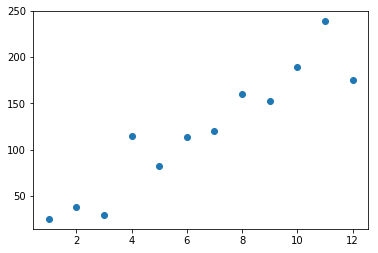

In [131]:
plt.scatter(X,y)
plt.show()

In [132]:
dataFrame[['mês', 'faturamento']].corr()

,mês,faturamento
mês,1.000000,0.935045
faturamento,0.935045,1.000000


### Criar Modelo Preditivo aplicando fórmulas (manualmente)

<center><strong>Equação da Regressão Linear</strong></center><br>
Essa é a equação para desenhar uma reta. Mas quando usamos essa equação para criar uma Regressão Linear especificamente, colocamos o acento circunflexo no $\hat{y}$.

$$\hat{y} = mx + b$$

<strong>m</strong> = inclinação da linha<br>
<strong>b</strong> = interceptação do y<br>
<strong>(x,y)</strong> = pontos coordenados<br>

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

$$b = \frac {\sum y-m\sum x}{n}$$

**m**

In [133]:
X.sum()

78

In [134]:
y.sum()

1440

In [135]:
(X*y).sum

<bound method Series.sum of 0       25
1       76
2       87
3      460
4      410
5      684
6      840
7     1280
8     1377
9     1900
10    2629
11    2100
dtype: int64>

In [136]:
(X**2).sum()

650

In [137]:
(X.sum()**2)

6084

In [138]:
m = (len(y) * (X*y).sum() - X.sum() * y.sum())/(len(y) * (X**2).sum() - (X.sum())**2)

In [139]:
m.round(4)

17.5385

**b**

$$b = \frac {\sum y-m\sum x}{n}$$

In [140]:
b = (y.sum() - m * X.sum()) / len(y)

In [141]:
b.round()

6.0

#### Modelo Preditivo
Criar modelo preditivo para prever (ou estimar) o rendimento de qualquer mês

$$\hat{y} = mx + b$$

In [142]:
xpred = 24

In [143]:
ypred = m*xpred + b

In [144]:
ypred

426.92307692307696

#### Predições para os 12 meses
Criar uma lista contendo as predições para cada um dos 12 meses

In [145]:
pred_manual = []
for elemento in X:
    ypred = m*elemento+b
    pred_manual.append(ypred)

In [146]:
pred_manual

[23.538461538461522,
 41.07692307692306,
 58.6153846153846,
 76.15384615384615,
 93.6923076923077,
 111.23076923076923,
 128.76923076923075,
 146.3076923076923,
 163.84615384615384,
 181.3846153846154,
 198.9230769230769,
 216.46153846153845]

#### Inserir predições no DataFrame

In [147]:
dataFrame['predições'] = pred_manual

In [148]:
dataFrame

,mês,faturamento,predições
0,1,25,23.538462
1,2,38,41.076923
2,3,29,58.615385
3,4,115,76.153846
4,5,82,93.692308
5,6,114,111.230769
6,7,120,128.769231
7,8,160,146.307692
8,9,153,163.846154
9,10,190,181.384615


#### Visualizar Regressão Linear

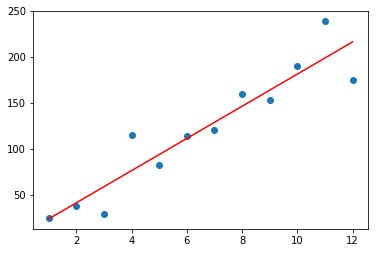

In [149]:
plt.scatter(X,y)
plt.plot(X,pred_manual,color='red')
plt.show()

### Coeficiente de Determinação - R-quadrado ($R²$)

$$R^2 = 1 - \frac {SQ_{res}} {SQ_{tot}} = 1 - \frac {\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \overline y)^2} $$

#### Calcular Soma Quadrática dos Resíduos (SQres)

In [150]:
dataFrame['resíduos'] = y - pred_manual

In [151]:
SQres = (dataFrame['resíduos']**2).sum()

In [152]:
SQres

6323.538461538462

#### Calcular Soma Quadrática Total (SQtot)

In [153]:
media = dataFrame['faturamento'].mean()
media

120.0

In [154]:
dataFrame['faturamento_medio'] = media

In [155]:
SQtot = ((dataFrame['faturamento'] - dataFrame['faturamento_medio'])**2).sum()

In [156]:
SQtot

50310.0

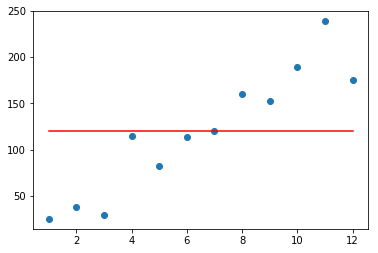

In [157]:
plt.scatter(X,y)
plt.plot(X,dataFrame['faturamento_medio'],color='red')
plt.show()

#### Calcular R-quadrado

In [158]:
r_quadrado = 1 - SQres/SQtot
r_quadrado

0.8743085179578918

### RMSE
Raiz do Erro Quadrático Médio

$ e = y_i - \hat{y_i} $ <br>

$ RMSE = \sqrt {\sum \frac {e^2}{n}}$<br>



In [159]:
(dataFrame['resíduos']**2).sum()

6323.538461538462

In [160]:
SQres

6323.538461538462

#### Importar numpy

In [161]:
import numpy as np

In [162]:
rmse = np.sqrt(SQres/len(dataFrame))

In [163]:
rmse

22.95564284574794

#### Regra Empírica 68-95-99.7

In [164]:
um_acima = pred_manual+rmse
um_abaixo = pred_manual-rmse

In [165]:
dois_acima = pred_manual+2*rmse
dois_abaixo = pred_manual-2*rmse

In [166]:
tres_acima = pred_manual+3*rmse
tres_abaixo = pred_manual-3*rmse

#### Um desvio padrão 68% 

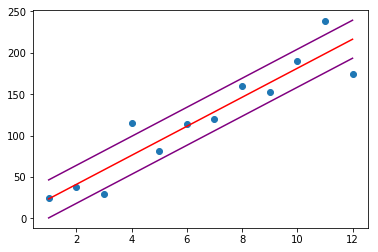

In [167]:
plt.scatter(X,y)
plt.plot(X,pred_manual,color='red')
plt.plot(X,um_acima,color='purple')
plt.plot(X,um_abaixo,color='purple')
plt.show()

#### Dois desvios padrões 95%

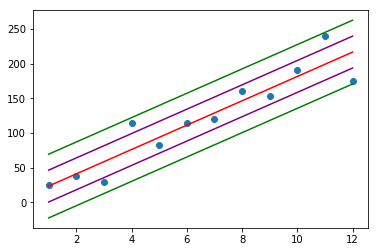

In [168]:
plt.scatter(X,y)
plt.plot(X,pred_manual,color='red')
plt.plot(X,um_acima,color='purple')
plt.plot(X,um_abaixo,color='purple')
plt.plot(X,dois_acima,color='green')
plt.plot(X,dois_abaixo,color='green')
plt.show()

#### Três desvios padrões 99.7%

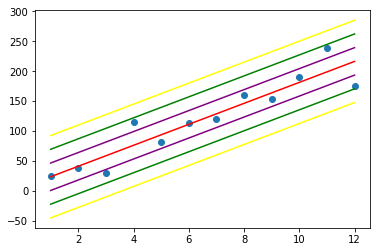

In [169]:
plt.scatter(X,y)
plt.plot(X,pred_manual,color='red')
plt.plot(X,um_acima,color='purple')
plt.plot(X,um_abaixo,color='purple')
plt.plot(X,dois_acima,color='green')
plt.plot(X,dois_abaixo,color='green')
plt.plot(X,tres_acima,color='yellow')
plt.plot(X,tres_abaixo,color='yellow')
plt.show()

### Regressão Linear - Statsmodels

#### Importar Statsmodels 

In [170]:
import statsmodels.api as sm

#### Definir x e y

In [171]:
x = dataFrame['mês']
y = dataFrame['faturamento']

In [172]:
x

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: mês, dtype: int64

#### Adicionar constante

In [173]:
x = sm.add_constant(x.values)

In [174]:
x

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.]])

#### Treinar Modelo

In [175]:
modelo = sm.OLS(y,x).fit()

#### Gerar predição

In [176]:
sm_pred = modelo.predict()
sm_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

#### Verificar parâmetros de performance do Modelo Preditivo

In [177]:
modelo.summary()

/home/ana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            faturamento   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     69.56
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           8.16e-06
Time:                        20:26:33   Log-Likelihood:                -54.630
No. Observations:                  12   AIC:                             113.3
Df Residuals:                      10   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0000     15.477      0.388      0.706     -28.484      40.484
x1            17.5385      2.103      8.340      0.000      12.853      22.224
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.142
Skew:                           0.175   Prob(JB):                        0.932
Kurtosis:                       2.599   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### RMSE

In [178]:
from statsmodels.tools.eval_measures import rmse

In [179]:
rmse(y,sm_pred).round(4)

22.9556

### Regressão Linear - Sklearn

#### Importar sklearn

In [180]:
from sklearn import linear_model

#### Instanciar Modelo de Regressão Linear

In [181]:
lm = linear_model.LinearRegression()

#### Reshape x (remodelar x)
Se X não possuir múltiplas variáveis, sklearn solicita que modifiquemos o formato

In [182]:
x = dataFrame['mês']
y = dataFrame['faturamento']

In [185]:
x = np.array(x).reshape(-1,1)

#### Treinar Modelo

In [186]:
sk_modelo = lm.fit(x,y)

#### Gerar predições

In [187]:
sk_pred = sk_modelo.predict(x)

In [191]:
x_pred = np.array([24]).reshape(-1,1)

In [188]:
sk_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

#### $R^2$

In [192]:
lm.score(x,y)

0.8743085179578917

#### m

In [193]:
lm.coef_

array([17.53846154])

#### b

In [194]:
lm.intercept_

6.000000000000014

### RMSE

In [195]:
from sklearn.metrics import mean_squared_error

In [196]:
mse = mean_squared_error(y,sk_pred)

In [198]:
np.sqrt(mse)

22.95564284574794

### Todas Predições

#### Calculado Manualmente

In [ ]:
pred_manual

#### Calculado via Statsmodel

#### Calculado via Sklearn